<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/GW/GWCA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PX4195: Gravitational-Wave Detectors
## Homework 4
### Miles Clarke-Henshaw

## QUESTION 1
### Fabry-Perot cavity (50%)

Assume a 2-mirror Fabry-Perot cavity with a laser shining light onto mirror M1 (with power transmissivity T1), a distance of 1 meter between mirrors M1 and M2, and mirror M2 with a Reflectivity of R2 = 95 %. Assume further that the cavity is on resonance with the laser.

**a)** What is the free spectral range (FSR) of the cavity?

**b)** How can the formula for the power buildup in a cavity (P1/P0 or Pcav/Pin) be simplified for cavities that are on resonance with the laser light? What does it mean to be on resonance?

**c)** Using the formula for the cavity power buildup on resonance, plot the buildup factor (P1/P0) as function of the power transmissivity T1 of mirror M1. (You can use any plotting tool of your choice for this. Make sure to have enough precision in the calculation.)

**d)** If the goal is to have the maximum power in the cavity, then what should the value T1 of mirror M1 be? (You can just read the value from your plot or calculate it otherwise, as you wish.)

**e)** What is the Full Width Half Maximum (FWHM) of the cavity for the chosen value of T1?

**f)** What is the Finesse of this cavity?


### a)
FSR is the spacing between 2 peaks.
Assuming the cavity is on resonance with the laser we can say $2kl = 2n\pi$, with the spacing between two neighboring peaks given as $kl = \pi$ because the number of waves inside the cavity si integer at resonance.

We can substitute in the wavespeed equation, $v = f\lambda$, to give $\frac{2\pi}{\lambda}L = \pi$.

Because L, the distance between the two mirrors, is a constant, we can fix it and actuate the laser wavelength (frequency):

$\Delta v = \frac{c}{2L} = \frac{3\times10^8ms^{-1}}{2 \times 1m}$

which gives us the Free Spectral Range, $v_{FSR} = 1.5\times10^8Hz$.

### b)
The cavity power enhancement equation is:

$\frac{P_{cav}}{P_{in}} = \frac{t_1^2}{1+R_1R_2-2r_1r_2cos(2kl)}$

${P_{cav}}/{P_{in}}$ can be simplified for cavities that are on resonance with the laser light as they are maximised when $cos(2kl) = 1$ where $2kl = 2n\pi$ giving:

$\frac{P_{cav}}{P_{in}} = \frac{t_1^2}{1+R_1R_2-2r_1r_2}$

When a cavity is on resonance it means the round-trip phase shift of the light within the cavity is an integer multiple of 2π. This constructive interference leads to a significant buildup of optical power within the cavity.


### c)
The formula for the cavity power buildup on resonance from the previous part is:

$\frac{P_{cav}}{P_{in}} = \frac{t_1^2}{1+R_1R_2-2r_1r_2}$

We can make use of the fact that $r_1^2 = 1 - t_1^2$ and hence $R_1 = 1 - T_1$ and we are also given that $r_2^2 = R_2 = 0.95$ in the question. Substituting these results into the above equation gives:

$\frac{P_{cav}}{P_{in}} = \frac{t_1^2}{1+(1-T_1)0.95 -2\sqrt{1-T_1}\sqrt{0.95}}$

Plotting the buildup factor as a function of the power transmissivity of mirror 1:

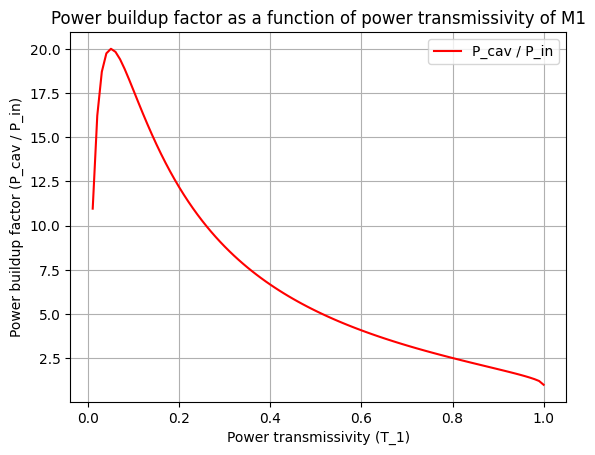

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Defining constants
R2 = 0.95

#Creating values of T1 from 0 (min) to 1 (max)
T1_vals = np.linspace(0.01, 1, 100)

#Function for the power buildup
def power_buildup(T1):
    R1 = 1 - T1 #Reflectivity of M1
    r1 = np.sqrt(R1) #Reflection coeff for M1
    r2 = np.sqrt(R2) #Reflection coeff for M2
    return T1 / (1 + R1 * R2 - 2 * r1 * r2) #Power buildup formula

#Plotting results
plt.plot(T1_vals, power_buildup(T1_vals), color='red', label='P_cav / P_in')
plt.title('Power buildup factor as a function of power transmissivity of M1')
plt.xlabel('Power transmissivity (T_1)')
plt.ylabel('Power buildup factor (P_cav / P_in)')
plt.grid()
plt.legend()

### d)
By identifying the peak on the graph, we can determine at what value of T_1 the power is maximised in the cavity.

19.99999999999865


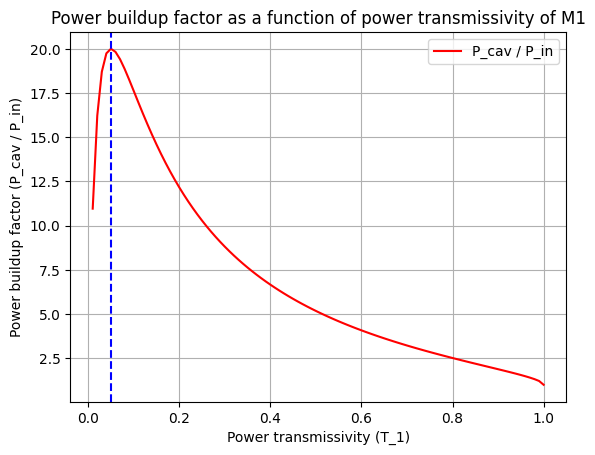

In [24]:
#Plotting results from part c again
plt.plot(T1_vals, power_buildup(T1_vals), color='red', label='P_cav / P_in')
plt.title('Power buildup factor as a function of power transmissivity of M1')
plt.xlabel('Power transmissivity (T_1)')
plt.ylabel('Power buildup factor (P_cav / P_in)')
plt.grid()
plt.legend()

#Plotting a vertical line to identify the peak/maximum power in the cavity
print(np.max(power_buildup(T1_vals)))
plt.axvline(0.05, color='blue', linestyle='--', label='T_1 = 0.05 (Peak)')

### e)
The equation for the Full Width Half Maximum (FWHM) is given by:

$v_{FWHM} = \frac{c}{\pi L} arcsin(\frac{1-r_1r_2}{2\sqrt{r_1r_2}})$

We can use $T_1 = 0.05$ and hence $t_1 = \sqrt{0.05}$ as calculated in the previous part.

We also know $r_2 = \sqrt{0.95}$ and $r_1 = \sqrt{1-T_1} = \sqrt{1-0.05} = \sqrt{0.95}$ and hence $r_1 = r_2$

$v_{FWHM} = \frac{3\times10^8ms^{-1}}{\pi\times 1m} arcsin(\frac{1-0.95}{2\sqrt{0.95}}) = 2.45\times10^6Hz$

### f)
The Finesse is the ratio of the Free Spectral Range (FSR) to the Full Width at Half Maximum (FWHM):

$\mathcal{F} = \frac{v_{FSR}}{v_{FWHM}}$

Substituting in the previously calculated values for $v_{FSR} = 1.5\times10^8Hz$ and $v_{FWHM} = 2.45\times10^6Hz$:

$\mathcal{F} = \frac{1.5\times10^8Hz}{2.45\times10^6Hz} = 61.22$.

## QUESTION 2
### Gaussian beams (50%)

RELEVANT FORMULAS:
$w(z) = w_0 \sqrt{1 + (\frac{z}{z_R})^2}$

$z_R = \frac{\pi w_0^2}{\lambda}$

$\frac{P_{out}}{P_0} = e^{-\frac{2r^2}{w^2}}$

TianQin is a Chinese proposal of a space mission for detecting gravitational waves with three satellites sending each other laser beams. The satellites would orbit earth in an equilateral triangle and the distance between each pair of spacecraft would be about 170,000 km. Assume a laser wavelength of 1064 nm, a laser power of 1W and a beam waist size (for sub-problems a) and b) and e)) of 1 m at a sending spacecraft.

**a)** What is the Raleigh range ($z_R$) of the laser beams?

**b)** What is the beam size at the receiving spacecraft?

**c)** Plot the beam size at a receiving spacecraft as function of the beam size at the sending spacecraft.

**d)** What is the optimal beam size at the sending spacecraft if the receiving spacecraft should receive a beam that is as small as possible? (you can read the value from your graph.)

**e)**What is the laser power that a receiving spacecraft collects for a receiving telescope that has a circular collection area of 1 m diameter? (You can use the initial beam waist size of 1 m for this.)
